In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,minmax_scale


from altair import *
import matplotlib.pyplot as plt
%matplotlib inline
mapper = {
    'pri_neigh':'neighborhood',
    'nearestTrainStopDist_sb':'nearestTransitStopDist_sb',
    'nearestTrainStopDist_nsb':'nearestTransitStopDist_nsb',
    'neighborho':'neighborhood',
    'nearestBusStopDist_sb':'nearestTransitStopDist_sb',
    'nearestBusStopDist_nsb':'nearestTransitStopDist_nsb'
}

In [2]:
sf = pd.read_csv('sf_ratios_081117.csv')
sf.rename(columns=mapper,inplace=True)
print(sf.shape)
sf.head()

(20, 15)


,neighborhood,nearestParkDist_sb,nearestTransitStopDist_sb,index_sb,nearestCoffeeDist_sb,nearestParkDist_nsb,nearestTransitStopDist_nsb,index_nsb,nearestCoffeeDist_nsb,nsbRatio,price,area,areaPerSB,areaPerNSB,areaPerCoffee
0,Bayview,0.004877,0.000314,1,0.002994,0.004976,0.001146,13,0.002023,13.000000,3270.0,0.001296,0.001296,0.000100,0.000093
1,Castro/Upper Market,0.003271,0.000266,2,0.001060,0.002343,0.000503,14,0.001315,7.000000,3270.0,0.000227,0.000113,0.000016,0.000014
2,Downtown/Civic Center,0.002273,0.000368,8,0.000949,0.001886,0.000401,22,0.000704,2.750000,3270.0,0.000171,0.000021,0.000008,0.000006
3,Financial District,0.003505,0.000457,34,0.000713,0.004371,0.000531,45,0.000555,1.323529,3700.0,0.000184,0.000005,0.000004,0.000002
4,Inner Richmond,0.004901,0.000766,2,0.001720,0.003120,0.000603,15,0.001370,7.500000,3270.0,0.000348,0.000174,0.000023,0.000020


In [3]:
chi = pd.read_csv('chicago_ratios_081117.csv')
chi.rename(columns=mapper,inplace=True)
print(chi.shape)
chi.head()

(37, 15)


,neighborhood,index_sb,nearestTransitStopDist_sb,nearestCoffeeDist_sb,nearestParkDist_sb,index_nsb,nearestTransitStopDist_nsb,nearestCoffeeDist_nsb,nearestParkDist_nsb,nsbRatio,price,area,areaPerSB,areaPerNSB,areaPerCoffee
0,Albany Park,2,0.008307,0.006013,0.039140,2.0,0.006201,0.006013,0.039068,1.0,1010.0,0.000540,0.000270,0.000270,0.000135
1,Andersonville,1,0.009828,0.004972,0.039809,1.0,0.009682,0.001469,0.044625,1.0,1020.0,0.000097,0.000097,0.000097,0.000048
2,Belmont Cragin,2,0.043445,0.002069,0.074497,2.0,0.028794,0.020678,0.044437,1.0,850.0,0.001100,0.000550,0.000550,0.000275
3,Beverly,1,0.000000,0.023791,0.210110,1.0,0.054787,0.023791,0.188951,1.0,1020.0,0.000892,0.000892,0.000892,0.000446
4,Boystown,1,0.009095,0.001523,0.017254,2.0,0.007175,0.002895,0.018635,2.0,1020.0,0.000034,0.000034,0.000017,0.000011


In [4]:
chi['price'] = (chi['price']-chi['price'].min())/(chi['price'].max()-chi['price'].min())
sf['price'] = (sf['price']-sf['price'].min())/(sf['price'].max()-sf['price'].min())
chi['nsbRatio'] = (chi['nsbRatio']-chi['nsbRatio'].min())/(chi['nsbRatio'].max()-chi['nsbRatio'].min())
sf['nsbRatio'] = (sf['nsbRatio']-sf['nsbRatio'].min())/(sf['nsbRatio'].max()-sf['nsbRatio'].min())

chi_noNeigh = chi[[ x for x in chi.columns if x if x not in ['neighborhood','index_sb','index_nsb','area']]]
sf_noNeigh = sf[[ x for x in sf.columns if x if x not in ['neighborhood','index_sb','index_nsb','area']]]
allData = pd.concat([chi_noNeigh,sf_noNeigh])

In [5]:
allDataScale = minmax_scale(allData)
#allDataScale = allData

In [6]:
pca = PCA(n_components=3)
trans = pca.fit(allDataScale)
pcaSumm = pd.DataFrame(trans.components_,columns=chi_noNeigh.columns,index = ['PC-1','PC-2','PC-3'])

In [7]:
print(pcaSumm.T[pcaSumm.T['PC-1']==pcaSumm.iloc[0].max()]['PC-1'])
print(pcaSumm.T[pcaSumm.T['PC-2']==pcaSumm.iloc[1].max()]['PC-2'])
print(pcaSumm.T[pcaSumm.T['PC-3']==pcaSumm.iloc[2].max()]['PC-3'])

nsbRatio    0.437418
Name: PC-1, dtype: float64
nearestTransitStopDist_sb    0.439352
Name: PC-2, dtype: float64
areaPerNSB    0.72082
Name: PC-3, dtype: float64


In [8]:
pcaCols = ['nsbRatio','nearestTransitStopDist_sb','areaPerNSB']
chi_noNeigh = chi_noNeigh[pcaCols]
sf_noNeigh = sf_noNeigh[pcaCols]

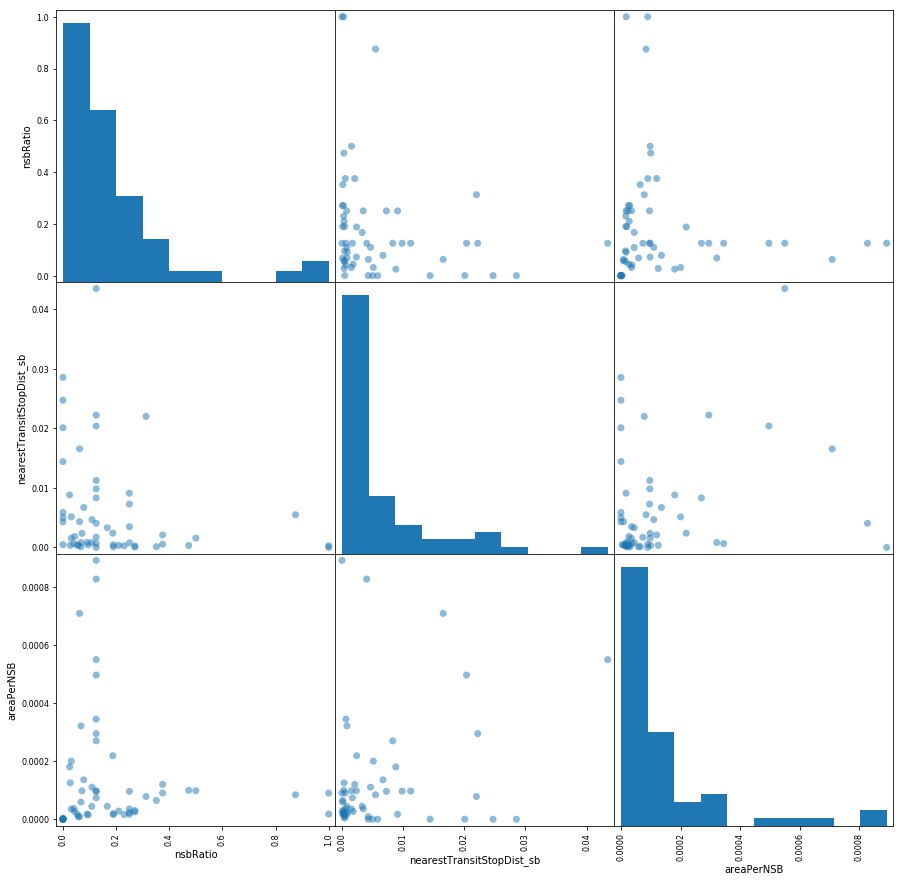

In [9]:
pd.plotting.scatter_matrix(allData[['nsbRatio','nearestTransitStopDist_sb','areaPerNSB']],figsize=[15,15],s=200)
plt.show()

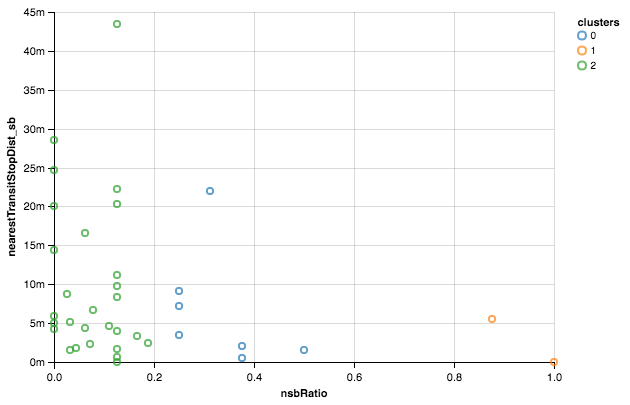

In [15]:
# get clusters with kmeans
clusters = KMeans(3)
labels = clusters.fit(chi_noNeigh)
chi['clusters'] = labels.labels_

# visualize, minus those without data for the reduced metrics
Chart(chi).mark_point().encode(
    x='nsbRatio',
    y='nearestTransitStopDist_sb',
    color='clusters:N'
)

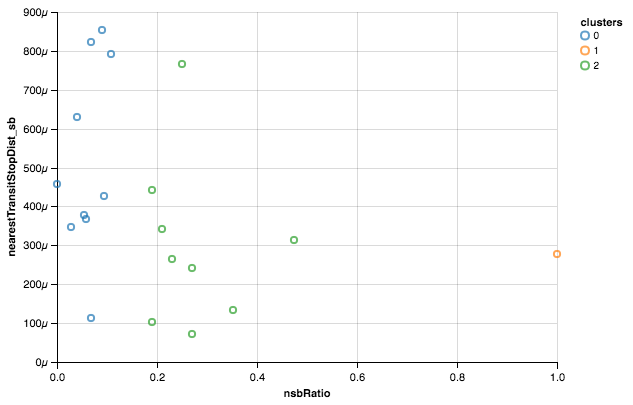

In [11]:
# get clusters with kmeans
clusters = KMeans(3)
labels = clusters.fit(sf_noNeigh)
sf['clusters'] = labels.labels_

# visualize
Chart(sf).mark_point().encode(
    x='nsbRatio',
    y='nearestTransitStopDist_sb',
    color='clusters:N'
)

In [12]:
sim = pd.DataFrame(cosine_similarity(chi.drop('neighborhood',axis=1),sf.drop('neighborhood',axis=1)))
sim.columns = sf['neighborhood']
sim.index = chi['neighborhood']

In [13]:
sf[sf['clusters']==1]

,neighborhood,nearestParkDist_sb,nearestTransitStopDist_sb,index_sb,nearestCoffeeDist_sb,nearestParkDist_nsb,nearestTransitStopDist_nsb,index_nsb,nearestCoffeeDist_nsb,nsbRatio,price,area,areaPerSB,areaPerNSB,areaPerCoffee,clusters
8,Mission,0.002354,0.000279,1,0.0,0.002771,0.001114,26,0.001306,1.0,0.592233,0.000458,0.000458,0.000018,0.000017,1


In [14]:
chi[chi['clusters']==1]

,neighborhood,index_sb,nearestTransitStopDist_sb,nearestCoffeeDist_sb,nearestParkDist_sb,index_nsb,nearestTransitStopDist_nsb,nearestCoffeeDist_nsb,nearestParkDist_nsb,nsbRatio,price,area,areaPerSB,areaPerNSB,areaPerCoffee,clusters
17,Logan Square,1,0.00000,0.004167,0.003764,8.0,0.002107,0.004094,0.005366,1.000,0.537879,0.000719,0.000719,0.000090,0.000080,1
34,West Town,1,0.00548,0.000829,0.025022,7.0,0.008623,0.004246,0.021733,0.875,0.909091,0.000590,0.000590,0.000084,0.000074,1
